Again we perform 
A, B, C of the unsupervised portion for a single run (single, random Monte-Carlo iteration) before performing it for M=30 iterations


NOTE : It hasn't been asked to normalize the data here, so we'll go with the raw data, the raw features as given originally

In [595]:
import pandas as pd
import numpy as np

df = pd.read_csv('wdbc.csv', header = None)


output = df.iloc[:,0]


for i in np.arange(0,df.shape[0]):
    if output.iloc[i] == 'B':
        output.iloc[i] = 0
    else:
        output.iloc[i] = 1



features = df.iloc[:,1:]

whole = pd.concat([features,output],axis=1)   # Raw features used, normalization not asked for in the question

whole.columns= ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23','X24','X25','X26','X27','X28','X29','X30','y']

print(whole)

        X1     X2      X3      X4       X5       X6       X7       X8      X9  \
0    17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010  0.14710  0.2419   
1    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
2    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
3    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
4    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
564  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
565  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
566  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
567  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
568   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587   

         X10  ...    X22   

C:\Users\DHRUV\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


As can be seen above, the features have been kept as is and haven't been normalized. This wasn't asked in the question and thus has been skipped.

In [596]:
whole.sort_values(by=['y'],inplace=True)
whole.reset_index(drop=True,inplace=True)
X_y_0 = whole.iloc[0:357,:]
X_y_1 = whole.iloc[357:569,:]
X_y_1.reset_index(drop=True,inplace=True)
print(X_y_0)             
print(X_y_1)
# Only 0 and 1 portions of the entire dataset, to obtain the required test proportions

        X1     X2      X3     X4       X5       X6       X7       X8      X9  \
0    12.89  15.70   84.08  516.6  0.07818  0.09580  0.11150  0.03390  0.1432   
1    15.19  13.21   97.65  711.8  0.07963  0.06934  0.03393  0.02657  0.1721   
2    12.21  18.02   78.31  458.4  0.09231  0.07175  0.04392  0.02027  0.1695   
3    13.40  16.95   85.48  552.4  0.07937  0.05696  0.02181  0.01473  0.1650   
4    16.50  18.29  106.60  838.1  0.09686  0.08468  0.05862  0.04835  0.1495   
..     ...    ...     ...    ...      ...      ...      ...      ...     ...   
352  11.89  18.35   77.32  432.2  0.09363  0.11540  0.06636  0.03142  0.1967   
353   8.95  15.76   58.74  245.2  0.09462  0.12430  0.09263  0.02308  0.1305   
354  12.00  15.65   76.95  443.3  0.09723  0.07165  0.04151  0.01863  0.2079   
355  11.41  10.82   73.34  403.3  0.09373  0.06685  0.03512  0.02623  0.1667   
356  14.62  24.02   94.57  662.7  0.08974  0.08606  0.03102  0.02957  0.1685   

         X10  ...    X22     X23     X2

In [597]:
# Again, note normalization hasn't been performed

from sklearn.model_selection import train_test_split

X_y_train_0,X_y_test_0 = train_test_split(X_y_0,test_size = 0.2,shuffle=True)
X_y_train_1,X_y_test_1 = train_test_split(X_y_1,test_size = 0.2,shuffle=True)



X_y_train = pd.concat([X_y_train_0,X_y_train_1],axis=0)
X_y_test = pd.concat([X_y_test_0,X_y_test_1],axis=0)


from sklearn.utils import shuffle

X_y_train = shuffle(X_y_train)
X_y_test = shuffle(X_y_test)



X_y_train.reset_index(drop=True,inplace=True)
X_y_test.reset_index(drop=True,inplace=True)


X_train = X_y_train.drop(columns=['y'])
X_test = X_y_test.drop(columns=['y'])
y_train = X_y_train['y'].astype(int)
y_test =  X_y_test['y'].astype(int)
print(X_train)
print(y_train)
print(X_test)
print(y_test)


# the above code generates the train and test sets, raw, with the required class proportions, as before

         X1     X2      X3      X4       X5       X6        X7        X8  \
0     9.465  21.01   60.11   269.4  0.10440  0.07773  0.021720  0.015040   
1    13.210  25.25   84.10   537.9  0.08791  0.05205  0.027720  0.020680   
2    12.680  23.84   82.69   499.0  0.11220  0.12620  0.112800  0.068730   
3    17.570  15.05  115.00   955.1  0.09847  0.11570  0.098750  0.079530   
4    14.220  23.12   94.37   609.9  0.10750  0.24130  0.198100  0.066180   
..      ...    ...     ...     ...      ...      ...       ...       ...   
449  11.220  33.81   70.79   386.8  0.07780  0.03574  0.004967  0.006434   
450  17.050  19.08  113.40   895.0  0.11410  0.15720  0.191000  0.109000   
451   9.738  11.97   61.24   288.5  0.09250  0.04102  0.000000  0.000000   
452  11.990  24.89   77.61   441.3  0.10300  0.09218  0.054410  0.042740   
453  20.920  25.09  143.00  1347.0  0.10990  0.22360  0.317400  0.147400   

         X9      X10  ...    X21    X22     X23     X24      X25      X26  \
0    0.171

In [598]:
# Performing K-Means on the entire train, with k = 2
# We perform K-Means multiple times, to ensure convergence to global optimum, each time with random initial assignment

# In actuality, and ideally, k-means should be performed randomly multiple times, each time with an initial random 
# cluster assignment. This assignment should be stored, for each random iteration, and the objective function (function to min.)
# for k-means also stored for each random iteration

# Then the initial random assignment that gives the corresponding minimum objective function, of all the iterations, should
# then be picked. This initial random cluster assignment is the assignment that actually leads to a global convergence (global min.)

# Here, again, this won't be done. Reason mostly stems from making the problem simple

# We will perform K-means multiple times here, each time with a random initial cluster assignment, in scikit, and assume convergence
# by the time the algorithm picks the final random cluster assignment.

# Again, while not exactly true, storing the initial cluster assignments for each iteration, calculating objective function
# for each iteration, then selecting the assignment that leads to the most minimal objective function and re-clustering over
# that assignment is relatively complicated (computationally, but also somewhat algorithmically).

# Thus, from multiple random k-means trials, we assume eventual convergence


from sklearn.cluster import KMeans

for i in np.arange(0,10):        # refitting k-means 10 times 
                                 # only 10, to save computational intensity, can be increased at the price/cost of run times
    kmeans = KMeans(n_clusters=2,init='random',n_init=10).fit(X_train)   # fitting clusters on entire train, with random initial cluster assignments

    
# NOTE : Both KMeans and SpectralCLustering have n_init = 10. As such the external loop is not required, but since it was used for 
# KMeans we will also use it for SpectralClustering. In all, again, the final fit will be the last one, and the total randomized
# trials will be 10*10, increasing our chances of picking optimal clusters (globally optimal)

    
# the k-means performed at the end i.e. for i=9 or for the 10th time is chosen for subsequent portions

# we assume by the 10th time or by i=9, the kmeans fit over X_train, selects an appropriately selected random initial cluster
# assignment that leads to global convergence

# we could 'poll' the results of all kmeans, or 'poll' over the obtained clusters, to obtain the polled cluster assignment
# however this isn't done. One reason being this increases complexity. Another being this, then has to be done every
# single time, whenever clusters are found over any test set. Also it required storage of the random initial assignments
# for consistency

# thus polling isn't done, and we assume that there is an 'iterative convergence'
# additionally storing objective and initial clusters also isn't done for simplicity
# also, as Monte-Carlo runs, we assume, that the 'averaged' parameters point to the globally converged set of clusters

# thus, in conclusion, last fitted kmeans = KMeans(parameters).fit(X_train) is our fit over which subsequent portions are thus
# done


y_train_pred_cluster = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

print(y_train_pred_cluster)    
print(cluster_centers)

[1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1
 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0
 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 0]
[[1.95524272e+01 2.17500000e+01 1.29460194e+02 1.20618252e+03
  1.01922524e-01

The clusters predicted and the cluster centers are obtained as above

PART A
There are a few ways to guarantee kmeans convergence. By performing kmeans multiple times, with random initialized cluster assignments, we can guarantee that at least one of those few kmeans iterations will converge to the global optimum

As such, this can be checked by measuring the kmeans objective functions for each iteration, storing it, storing the corresponding cluster assignment (which was done at random). The assignment that minimizes the objective over all the local optimals, thus give us the cluster assignment that converges to the global optimal.

Obviously while this is the most accurate way to do kmeans, it takes up a lot of computation, run time and memory. If various scores for kmeans are needed, we assume by performing kmeans multiple times (Monte-Carlo) and storing the scores each time, the overall average score, corresponds to the one obtained via the globally optimum trained kmeans.

Thus the external Monte-Carlo iterations, more or less, guarantee globally optimal converged scores

NOTE : 

For each Monte iteration, if the optimal k-means is needed that also increases computation. Within each Monte-Carlo iteration, off of the multiple ways to try for kmeans convergence, a few are thus:
- We can, for each Monte iteration, train kmeans multiple times, using random cluster assignments each time. Then 'poll' the       obtained kmeans labels over all the obtained labels. Something similar may be done for the 'polled' cluster centers
  However, as explained in comments, this then needs to be performed for all fits and predictions with multiple complications of   storage and polling functions to define the 'kmeans' final fit function
  This, is complicated, time consuming, and to a certain extent not needed due to the external Monte-Carlo iterations
  
- We can, for each Monte iteration, store objective and initial random cluster assignment for all within Monte kmeans
  iterations. Then we pick the initial assignment that minimizes this 'minimized objective' over all local optimals.
  This, again, is complicated, computationally intensive, requires a lot of storage.
  Note, that this is the absolutely correct method. Not needed even for Monte-Carlo (as we do perform Monte iterations             externally)
  
- We can, for each Monte iteration, train kmeans multiple times, each time with a random initial cluster assignment. We assume     then, that the final fit corresponds to the globally convergent point. Again, while not true, this multiple iteration           approach with the selection of the final/last fit, does more or less guarantee an eventual convergence to global optimal         point. Multiple iterations, with the selection of last one, definitely increases our chances of selecting the globally           optimal fit.
  Computationally easy, uncomplicated.
  
The second approach is the best and correct. The first approach is a good approximate to the second one. The third one is the easiest, most practical and least complicated.

Noting, that, Monte-Carlo, is as is performed, we may use the third 'within-each-Monte-iteration' approach, since Monte does ensure that the scores, the averaged ones, do reflect the nature of globally converged kmeans fit over our dataset.

Thus the third-within-monte-iteration approach has been used in the coding portion above this markdown due to its practicality and its convenience and due to the above mentioned facts.

Results for B. and C. in subsequent coding portions, Monte performed in a seperate file, this is for one such Monte iteration.

In [599]:
# Calculating sample distance for each sample in X_train from their corresponding cluster center

X_train_dist_0 = kmeans.transform(X_train)[:,0]
X_train_dist_1 = kmeans.transform(X_train)[:,1]

# distance arrays from cluster center 0 and 1 for all samples

all_indx = np.arange(0,X_train.shape[0])           # all indices of X_train, stored in an array

list_cluster_0 = []         # indices of samples classified to cluster 0
list_cluster_1 = []         # indices of samples classified to cluster 1

for i in all_indx:
    if y_train_pred_cluster[i] == 0:
        list_cluster_0.append(i)
    else:
        list_cluster_1.append(i)
        
# at the end of this for loop, list_cluster_0 and list_cluster_1 contain indices of all samples (internal indices) clustered
# to cluster 0 and cluster 1 respectively

dist_0_0 = X_train_dist_0[list_cluster_0]   # distance of samples classified to cluster 0 from cluster center 0
dist_1_1 = X_train_dist_1[list_cluster_1]   # distance of samples classified to cluster 1 from cluster center 1

# list_cluster_0 and list_cluster_1 has indices of samples in X_train (internal) classified to cluster 0 and cluster 1
# the indices of samples in cluster 0 (list_cluster_0) slices the array that contains distances of all samples from cluster center
# 0. This is stored in dist_0_0. Same for dist_1_1

# thus dist_0_0 and dist_1_1 contains distances of samples from cluster center 0 and cluster center 1, but only those samples
# that correspond to sample index in list_cluster_0 and list_cluster_1, which again contain only samples classified to 
# cluster 0 and cluster 1

# so, dist_0_0 ---- list_cluster_0 --------- sample index in X_train in cluster 0
# so, dist_1_1 ---- list_cluster_1 --------- sample index in X_train in cluster 1

df_0 = pd.DataFrame(np.transpose(np.array([np.array(list_cluster_0),dist_0_0])),columns=['index','distance'])
df_1 = pd.DataFrame(np.transpose(np.array([np.array(list_cluster_1),dist_1_1])),columns=['index','distance'])

#  df for 0 and 1 (0/1) :

#                 col                              col 
#  row    index (0/1 sample)         distance of corresponding sample from 0/1 cluster
#  row    index (0/1 sample)         distance of corresponding sample from 0/1 cluster
#  row    index (0/1 sample)         distance of corresponding sample from 0/1 cluster
#  row    index (0/1 sample)         distance of corresponding sample from 0/1 cluster
#   .           .                                   .
#   .           .                                   . 
#   .           .                                   .






# sorting to pick 30 closest for each

# we will assume that at least 30 points have been classified to both clusters (cluster 0 and cluster 1 have 30 points at least)

# we could, code, extra logic to ensure that when this doesn't happen (say cluster 0 has less than 30 samples or cluster 1)
# polling is done consequently

# however looking at the dataset this issue shouldn't arise, especially given that 30 is a pretty low number

# extra code for the 'weird case' would, as is, only take 1-2 lines, not more, for simplicity this 'what if?' case has 
# been ignored as we assume for this dataset this shouldn't happen in line with how it is distributed

# dimensions are pretty large, so we should be able to obtain 'consequential clusters' such that this doesn't happen


df_0_srt_slc = df_0.sort_values(by=['distance'],ascending=True).iloc[0:30,:]
df_1_srt_slc = df_1.sort_values(by=['distance'],ascending=True).iloc[0:30,:]

sel_indx_0_cls = df_0_srt_slc.iloc[:,0].to_numpy().flatten().astype(int)
sel_indx_1_cls = df_1_srt_slc.iloc[:,0].to_numpy().flatten().astype(int)

print(sel_indx_0_cls)
print(sel_indx_1_cls)


# sel_indx_0/1_cls contains the index of the samples in X_train classified to cluster 0/1 closest to cluster center 0/1
# (total 30 such indices obviously)

[304  21 111  15  66 358 184 330 391 353 369 428 328  48  86 107 162 235
 453 155 432 320 383 183  83  82 366 141 316 337]
[ 74 292 345  18 324 209 306 151  31 421 180  93 194 318 443 397 247 425
 171  58 444 165 198 402 323 252 322   1 390  78]


In [600]:
# now that indices have been obtained we'll correspondingly slice y_train (to read the true labels) and poll to obtain
# class for each cluster

y_train_read_0 = y_train[sel_indx_0_cls]
y_train_read_1 = y_train[sel_indx_1_cls]

# slicing

print(y_train_read_0)
print(y_train_read_1)

304    1
21     1
111    1
15     1
66     1
358    1
184    1
330    1
391    1
353    1
369    1
428    1
328    1
48     1
86     1
107    1
162    1
235    1
453    1
155    1
432    1
320    1
383    1
183    1
83     1
82     1
366    1
141    1
316    1
337    1
Name: y, dtype: int32
74     0
292    0
345    0
18     0
324    0
209    0
306    0
151    0
31     0
421    0
180    0
93     0
194    0
318    0
443    1
397    0
247    0
425    0
171    0
58     0
444    0
165    0
198    0
402    0
323    0
252    0
322    0
1      0
390    0
78     0
Name: y, dtype: int32


In [601]:
# now polling to classify clusters to a class (0/1)

import math
pol_thrsh = 0.5 # this threshold will be varied for ROC and AUC later, code can be copied is pol_thrsh used
                # threshold same for both clusters

read_labels_0 = y_train_read_0.to_numpy().flatten()   # to numpy
read_labels_1 = y_train_read_1.to_numpy().flatten()   # to numpy

pol_num_0 = math.floor(pol_thrsh*read_labels_0.size)     # decisive polling number off of same thresholds
pol_num_1 = math.floor(pol_thrsh*read_labels_1.size)     # decisive polling number off of same thresholds


pol_cnt_c0_0 = 0                    # label 0 counted for cluster 0
pol_cnt_c1_0 = 0                    # label 0 counted for cluster 1


for i in np.arange(0,read_labels_0.size):
    if read_labels_0[i] == 0:
        pol_cnt_c0_0 = pol_cnt_c0_0 + 1
        

if pol_cnt_c0_0 > pol_num_0:
    clus_0 = 0
else:
    clus_0 = 1
    


for i in np.arange(0,read_labels_1.size):
    if read_labels_1[i] == 0:
        pol_cnt_c1_0 = pol_cnt_c1_0 + 1
        

if pol_cnt_c1_0 > pol_num_1:
    clus_1 = 0
else:
    clus_1 = 1
    

    
print(clus_0)
print(clus_1)


# clus_0 and clus_1 assigns final class labels to both the cluster, via polling, using pol_thrsh

1
0


In [602]:
# kmeans has been fit over X_train
# by label reading, clusters 0 and 1 have been assigned labels (class) as described in HW
# now this same kmeans fit (stays same throughout, obviously), once it predicts a cluster for a sample
# can now predict class based on this cluster-class assigned, bridged via clus_0 and clus_1 which
# is specific to our kmeans fit (obtained in last of our 10 iterations, is the same throughout)
# all this, again, is for single Monte-Iteration, to get a 'feel'


# NOW for various scores

y_train_pred = np.zeros(X_train.shape[0])

for i in np.arange(0,X_train.shape[0]):
    if y_train_pred_cluster[i] == 0:
        y_train_pred[i] = clus_0
    else:
        y_train_pred[i] = clus_1
        
y_train_pred = y_train_pred.astype(int)
print(y_train_pred)

[0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1
 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 1]


TRAINING SCORES

In [603]:
mis = 0
for l in np.arange(0,X_train.shape[0]):
    if y_train_pred[l] != y_train.iloc[l]:
        mis = mis + 1

train_error = (mis/X_train.shape[0])*100
print('The training error is : \n',train_error,'%')

The training error is : 
 14.977973568281937 %


In [604]:
from sklearn.metrics import confusion_matrix

confusion_matrix_train = confusion_matrix(y_train,y_train_pred)

print('The confusion matrix for training is : \n',confusion_matrix_train)

The confusion matrix for training is : 
 [[284   1]
 [ 67 102]]


In [605]:
confusion_matrix_train_df = pd.DataFrame(confusion_matrix_train,index=['Actually 0','Actually 1'],columns=['Predicted 0','Predicted 1'])
print('The confusion matrix for train, appropriately indexed is : \n',confusion_matrix_train_df)

The confusion matrix for train, appropriately indexed is : 
             Predicted 0  Predicted 1
Actually 0          284            1
Actually 1           67          102


In [606]:
precision_train = (confusion_matrix_train[1][1]/(confusion_matrix_train[1][1]+confusion_matrix_train[0][1]))*100
recall_train = (confusion_matrix_train[1][1]/(confusion_matrix_train[1][1]+confusion_matrix_train[1][0]))*100

print('The precision for train is : \n',precision_train,'%')
print('The recall for train is : \n',recall_train,'%')

The precision for train is : 
 99.02912621359224 %
The recall for train is : 
 60.35502958579882 %


In [607]:
accuracy_train = ((confusion_matrix_train[0][0]+confusion_matrix_train[1][1])/(confusion_matrix_train[0][0]+confusion_matrix_train[1][1]+confusion_matrix_train[0][1]+confusion_matrix_train[1][0]))*100
f1_train = ((2*(precision_train/100)*(recall_train/100))/((precision_train/100)+(recall_train/100))) # divided by 100 as precision and recall specified in percentage
print('The accuracy for training is : \n',accuracy_train,'%')
print('The f1 score for training is : \n',f1_train)

The accuracy for training is : 
 85.02202643171806 %
The f1 score for training is : 
 0.7499999999999999


TEST SCORES

In [608]:
y_test_pred_cluster = kmeans.predict(X_test)

print(y_test_pred_cluster)

[1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1
 0 1 1 1]


In [609]:
y_test_pred = np.zeros(X_test.shape[0])
for i in np.arange(0,X_test.shape[0]):
    if y_test_pred_cluster[i] == 0:
        y_test_pred[i] = clus_0
    else:
        y_test_pred[i] = clus_1

y_test_pred = y_test_pred.astype(int)
print(y_test_pred)

[0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0
 1 0 0 0]


In [610]:
mis = 0
for l in np.arange(0,X_test.shape[0]):
    if y_test_pred[l] != y_test.iloc[l]:
        mis = mis + 1

test_error = (mis/X_test.shape[0])*100
print('The test error is obtained : \n',test_error,'%')

The test error is obtained : 
 15.65217391304348 %


In [611]:
confusion_matrix_test = confusion_matrix(y_test,y_test_pred)

print('The confusion matrix for test is : \n',confusion_matrix_test)

The confusion matrix for test is : 
 [[72  0]
 [18 25]]


In [612]:
confusion_matrix_test_df = pd.DataFrame(confusion_matrix_test,index=['Actually 0','Actually 1'],columns=['Predicted 0','Predicted 1'])
print('The confusion matrix for test, appropriately indexed is : \n',confusion_matrix_test_df)

The confusion matrix for test, appropriately indexed is : 
             Predicted 0  Predicted 1
Actually 0           72            0
Actually 1           18           25


In [613]:
precision_test = (confusion_matrix_test[1][1]/(confusion_matrix_test[1][1]+confusion_matrix_test[0][1]))*100
recall_test = (confusion_matrix_test[1][1]/(confusion_matrix_test[1][1]+confusion_matrix_test[1][0]))*100

print('The precision for test is : \n',precision_test,'%')
print('The recall for test is : \n',recall_test,'%')

The precision for test is : 
 100.0 %
The recall for test is : 
 58.139534883720934 %


In [614]:
accuracy_test = ((confusion_matrix_test[0][0]+confusion_matrix_test[1][1])/(confusion_matrix_test[0][0]+confusion_matrix_test[1][1]+confusion_matrix_test[0][1]+confusion_matrix_test[1][0]))*100
f1_test = ((2*(precision_test/100)*(recall_test/100))/((precision_test/100)+(recall_test/100))) # divided by 100 as precision and recall specified in percentage
print('The accuracy for test is : \n',accuracy_test,'%')
print('The f1 score for test is : \n',f1_test)

The accuracy for test is : 
 84.34782608695653 %
The f1 score for test is : 
 0.7352941176470588


ROC and AUC for Train and Test

Again, the code of pol_thrsh will be used here to obtain to ROC and AUC, both, for test as well as for train

In [615]:
# FOR TRAIN FIRST

# read_labels_0 and read_labels_1 stay consequential
# kmeans is consequential and predicted clusters (for both train and test) stay the same (as kmeans is the same)
# class prediction using the predicted clusters depend on our 'polling'
# polling depends on threshold which for roc and auc will be varied
# thus y_train_pred_cluster and y_test_pred_cluster stay same
# classifying rule changes
# so y_train_pred and y_test_pred changes
# this gives the roc and auc

pol_thrsh_ra_range = np.arange(0,1.01,0.01)  # varying threshold
ROC_df = pd.DataFrame(index=pol_thrsh_ra_range,columns=['FPR','TPR'])
ROC_df_test = pd.DataFrame(index=pol_thrsh_ra_range,columns=['FPR','TPR'])



for ra in np.arange(0,pol_thrsh_ra_range.size):
    
    pol_thrsh_ra = pol_thrsh_ra_range[ra]
    
    pol_num_0_ra = math.floor(pol_thrsh_ra*read_labels_0.size)    
    pol_num_1_ra = math.floor(pol_thrsh_ra*read_labels_1.size)
    
    pol_cnt_c0_0_ra = 0                    
    pol_cnt_c1_0_ra = 0                    


    for i in np.arange(0,read_labels_0.size):
        if read_labels_0[i] == 0:
            pol_cnt_c0_0_ra = pol_cnt_c0_0_ra + 1


    if pol_cnt_c0_0_ra > pol_num_0_ra:
        clus_0_ra = 0
    else:
        clus_0_ra = 1



    for i in np.arange(0,read_labels_1.size):
        if read_labels_1[i] == 0:
            pol_cnt_c1_0_ra = pol_cnt_c1_0_ra + 1


    if pol_cnt_c1_0_ra > pol_num_1_ra:
        clus_1_ra = 0
    else:
        clus_1_ra = 1



    # local cluster to class fixation done, based of given polling threshold
    
    y_train_pred_ra = np.zeros(X_train.shape[0])

    for i in np.arange(0,X_train.shape[0]):
        if y_train_pred_cluster[i] == 0:
            y_train_pred_ra[i] = clus_0_ra
        else:
            y_train_pred_ra[i] = clus_1_ra

    y_train_pred_ra = y_train_pred_ra.astype(int)
    
    
    
    
    
    
    
    
    y_test_pred_ra = np.zeros(X_test.shape[0])
    for i in np.arange(0,X_test.shape[0]):
        if y_test_pred_cluster[i] == 0:
            y_test_pred_ra[i] = clus_0_ra
        else:
            y_test_pred_ra[i] = clus_1_ra

    y_test_pred_ra = y_test_pred_ra.astype(int)
    
    # _ra everywhere to ensure distinction and localisation to this ROC and AUC section
    # this avoids any variable conflicts
    
    
    confusion_matrix_train_ra = confusion_matrix(y_train,y_train_pred_ra)
    ROC_df.iloc[ra,0] = confusion_matrix_train_ra[0][1]/(confusion_matrix_train_ra[0][1]+confusion_matrix_train_ra[0][0])
    ROC_df.iloc[ra,1] = confusion_matrix_train_ra[1][1]/(confusion_matrix_train_ra[1][1]+confusion_matrix_train_ra[1][0])
    
    
    confusion_matrix_test_ra = confusion_matrix(y_test,y_test_pred_ra)
    ROC_df_test.iloc[ra,0] = confusion_matrix_test_ra[0][1]/(confusion_matrix_test_ra[0][1]+confusion_matrix_test_ra[0][0])
    ROC_df_test.iloc[ra,1] = confusion_matrix_test_ra[1][1]/(confusion_matrix_test_ra[1][1]+confusion_matrix_test_ra[1][0])

    


    
print(ROC_df)
print(ROC_df_test)

             FPR      TPR
0.00  0.00350877  0.60355
0.01  0.00350877  0.60355
0.02  0.00350877  0.60355
0.03  0.00350877  0.60355
0.04  0.00350877  0.60355
...          ...      ...
0.96  0.00350877  0.60355
0.97           1        1
0.98           1        1
0.99           1        1
1.00           1        1

[101 rows x 2 columns]
     FPR       TPR
0.00   0  0.581395
0.01   0  0.581395
0.02   0  0.581395
0.03   0  0.581395
0.04   0  0.581395
...   ..       ...
0.96   0  0.581395
0.97   1         1
0.98   1         1
0.99   1         1
1.00   1         1

[101 rows x 2 columns]


Text(0, 0.5, 'TPR for Train')

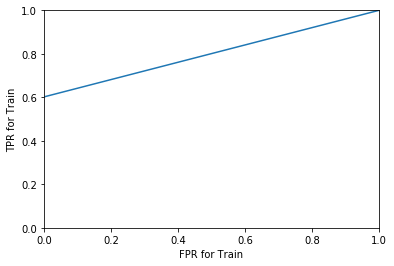

In [616]:
import matplotlib.pyplot as plt
plt.plot(ROC_df['FPR'],ROC_df['TPR'])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR for Train')
plt.ylabel('TPR for Train')

Text(0, 0.5, 'TPR for Test')

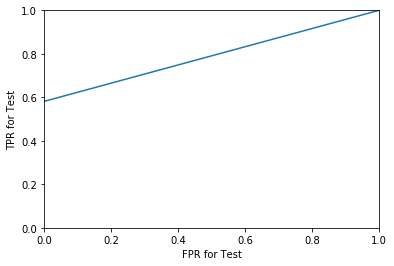

In [617]:
plt.plot(ROC_df_test['FPR'],ROC_df_test['TPR'])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR for Test')
plt.ylabel('TPR for Test')

In [618]:
from sklearn import metrics

AUC_train = metrics.auc(ROC_df['FPR'],ROC_df['TPR'])
print('The AUC for train is : \n',AUC_train)

The AUC for train is : 
 0.7989619017959099


In [619]:
AUC_test = metrics.auc(ROC_df_test['FPR'],ROC_df_test['TPR'])
print('The AUC for test is : \n',AUC_test)

The AUC for test is : 
 0.7906976744186047


Due to pol_thrsh algorithm that uses floor function, a threshold that should correspond to origin, corresponds very close
to origin, but not quite

Thus, this is why the ROC curves don't start from origin as is generally expected

As such, one reason for this also how polling for kmeans is done

This doesn't really affect the evaluational parameters, and the AUC

Due to polling nature and due to how thresholds were defined, and how 'sensitive' kmeans polling is to these thresholds the ROC curves are obtained in these consequential fashion

Again, this doesn't affect our consequential interpretations or the actual AUC which is obtained

As such the curves are in fact sharp (were obtained from origin previously; by minor polling variation) and we can assume the initial portion to coincide with the y-axis, like it is here